Примечания к задачам:

Необходимо использовать модуль numpy
Все данные должны считываться из файла в виде массива numpy
Результаты необходимо сохранять в файл
#### Задача 1
- Дано множество из p матриц (n,n) и множество из p векторов (n,1). Написать функцию для рассчета суммы p произведений матриц (результат имеет размерность (n,1))

#### Задача 2
- Написать функцию преобразовывающую вектор чисел в матрицу бинарных представлений.

#### Задача 3
- Написать функцию, которая возвращает все уникальные строки матрицы

#### Задача 4
- Написать функцию, которая заполняет матрицу с размерами (M,N) случайными числами распределенными по нормальному закону. Затем считает мат. ожидание и дисперсию для каждого из столбцов, а также строит для каждой строки стоит гистограмму значений (использовать функцию hist из модуля matplotlib.plot)

#### Задача 5
- Написать функцию, которая заполняет матрицу (M,N) в шахматном порядке заданными числами a и b.

#### Задача 6
- Написать функцию, которая возвращает тензор представляющий изображение круга с заданным цветом и радиусом в схеме rgd на черном фоне.

#### Задача 7
- Написать функцию, которая стандартизирует все значения тензор (отнять мат. ожидание и поделить на СКО)

#### Задача 8
- Написать функцию, выделяющую часть матрицы фиксированного размера с центром в данном элементе (дополненное значением fill если необходимо)

#### Задача 9
- Написать функцию, которая находит самое часто встречающееся число в каждой строке матрицы и возвращает массив этих значений

#### Задача 10
- Дан трёхмерный массив, содержащий изображение, размера (height, width, numChannels), а также вектор длины numChannels. Написать функцию, которая складывает каналы изображения с указанными весами, и возвращает результат в виде матрицы размера (height, width)

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
def sum_multi(path_to_set_m, path_to_set_v, n=4, p=3):
    dim: int = n
    set_m = np.genfromtxt(path_to_set_m, dtype=int, delimiter=',')
    set_v = np.genfromtxt(path_to_set_v, dtype=int, delimiter=',')
    result = np.zeros([dim,1], dtype=int)
    
    for i in range(p):
        inter_M = set_m[n-dim:n]
        inter_V = set_v[n-dim:n].reshape([dim,1])
        
        intermediate = np.tensordot(inter_M, inter_V, axes=1)
        result = np.add(result, intermediate)
        
        n += dim
        
    return result


In [24]:
sum_multi('data/data_M.csv', 'data/data_V.csv')

array([[1682],
       [1946],
       [2210],
       [2474]])

#### Задача 2
- Написать функцию преобразовывающую вектор чисел в матрицу бинарных представлений.

In [25]:
def create_bin_matrix(path_to_vector):
    vector = np.genfromtxt(path_to_vector, dtype=int, delimiter=',').reshape([-1,1])
    max_bit = np.ceil(np.log2(np.max(vector))).astype(int)
    
    B = ((vector & (2**np.arange(max_bit))) != 0).astype(int)
    return B

In [26]:
create_bin_matrix('data/data_vector.csv')

array([[0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 0, 0, 0],
       [0, 1, 1, 0, 0, 0, 0, 0],
       [1, 1, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0],
       [1, 0, 0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 1]])

#### Задача 3
- Написать функцию, которая возвращает все уникальные строки матрицы

In [27]:
def find_unique_lines(path_to_matrix):
    matrix = np.genfromtxt(path_to_matrix, dtype=int, delimiter=',')
    unique = np.unique(matrix, axis=0)
    return unique

In [28]:
find_unique_lines('data/data_m_ununiq.csv')

array([[0, 1, 2, 3],
       [0, 1, 2, 4],
       [0, 1, 3, 2]])

#### Задача 4
- Написать функцию, которая заполняет матрицу с размерами (M,N) случайными числами распределенными по нормальному закону. Затем считает мат. ожидание и дисперсию для каждого из столбцов, а также строит для каждой строки стоит гистограмму значений (использовать функцию hist из модуля matplotlib.plot)

In [29]:
def funny_normal_matrix(N: int = 10, M: int = 10):
    A = np.random.normal(0, 1, size=(N, M))
    A_T = A.transpose()

    fig, axes = plt.subplots(N, 1, figsize=(3,25))
    for i in range(N):
        print(f'Мат. ожидание {i} столбца {np.sum(A_T) / len((A_T))}')
        print(f'Дисперсия {i} столбца {A_T[i].var()}')
        sns.histplot(A[i], ax=axes[i], bins=int(M * 0.5))
    return A

Мат. ожидание 0 столбца -0.05219645054142348
Дисперсия 0 столбца 1.272744184747979
Мат. ожидание 1 столбца -0.05219645054142348
Дисперсия 1 столбца 0.20267903419012226
Мат. ожидание 2 столбца -0.05219645054142348
Дисперсия 2 столбца 1.3317177478578348
Мат. ожидание 3 столбца -0.05219645054142348
Дисперсия 3 столбца 1.4536728971677602
Мат. ожидание 4 столбца -0.05219645054142348
Дисперсия 4 столбца 0.4385900183876098


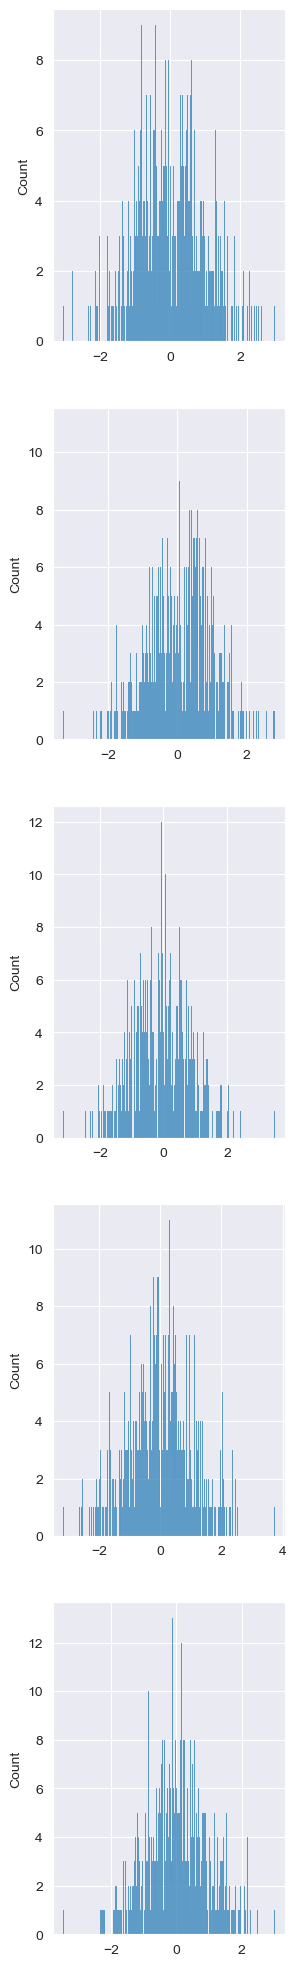

In [30]:
A = funny_normal_matrix(N=5, M=10000)

#### Задача 5
- Написать функцию, которая заполняет матрицу (M,N) в шахматном порядке заданными числами a и b.

In [31]:
def chess_matrix(M: int = 5, N: int = 5, a: int = 0, b: int = 1):
    matrix = np.array([[a if (i+j) % 2 else b for i in range(M)] for j in range(N)])
    return matrix

In [32]:
chess_matrix(M=10, N=10, b=10)

array([[10,  0, 10,  0, 10,  0, 10,  0, 10,  0],
       [ 0, 10,  0, 10,  0, 10,  0, 10,  0, 10],
       [10,  0, 10,  0, 10,  0, 10,  0, 10,  0],
       [ 0, 10,  0, 10,  0, 10,  0, 10,  0, 10],
       [10,  0, 10,  0, 10,  0, 10,  0, 10,  0],
       [ 0, 10,  0, 10,  0, 10,  0, 10,  0, 10],
       [10,  0, 10,  0, 10,  0, 10,  0, 10,  0],
       [ 0, 10,  0, 10,  0, 10,  0, 10,  0, 10],
       [10,  0, 10,  0, 10,  0, 10,  0, 10,  0],
       [ 0, 10,  0, 10,  0, 10,  0, 10,  0, 10]])

#### Задача 6
- Написать функцию, которая возвращает тензор представляющий изображение круга с заданным цветом и радиусом в схеме rgd на черном фоне.

In [33]:
def funny_circle(r, color, size: int=150):
    tensor = np.zeros((size, size, 3), dtype=np.uint8)

    for y in range(size):
        for x in range(size):
            if (x - r) ** 2 + (y - r) ** 2 <= r ** 2:
                tensor[y, x] = color

    return tensor



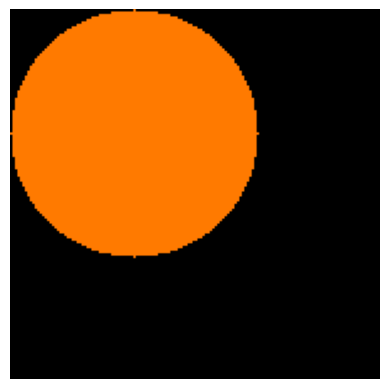

In [34]:
plt.imshow(funny_circle(50, (255, 122, 0)))
plt.axis('off')
plt.show()

#### Задача 7
- Написать функцию, которая стандартизирует все значения тензор (отнять мат. ожидание и поделить на СКО)

In [35]:
def standard(path_to_vector):
    tensor = np.genfromtxt(path_to_vector, dtype=int, delimiter=',')
    result = np.array(list(map(lambda x: (x - (np.sum(tensor)/len(tensor))) - np.std(tensor), tensor)))
    return result, type(result)

In [36]:
standard('data/data_vector.csv')

(array([-51.71403669, -50.71403669, -49.71403669, -48.71403669,
        -47.71403669, -46.71403669, -45.71403669, -44.71403669,
        -43.71403669, -42.71403669,  77.28596331]),
 numpy.ndarray)

#### Задача 8
- Написать функцию, выделяющую часть матрицы фиксированного размера с центром в данном элементе (дополненное значением fill если необходимо)

In [37]:
def slice_cube(center = (1, 1), M = 1, N = 1, cut:bool = False, MATRIX_path='data/data_matrix.csv'):
    matrix = np.zeros([M+N * 5, M+N * 5])
    x, y = center
    
    matrix[x-M:x+N+1, y-N:y+N+1] = 1

    if cut:
        MATRIX_cut = np.genfromtxt(MATRIX_path, dtype=int, delimiter=',')
        return MATRIX_cut, MATRIX_cut[x-M:x+M+1, y-N:y+N+1]
     
    else:
        return matrix
    

In [38]:
slice_cube(center = (10, 10), M = 5, N = 5)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1

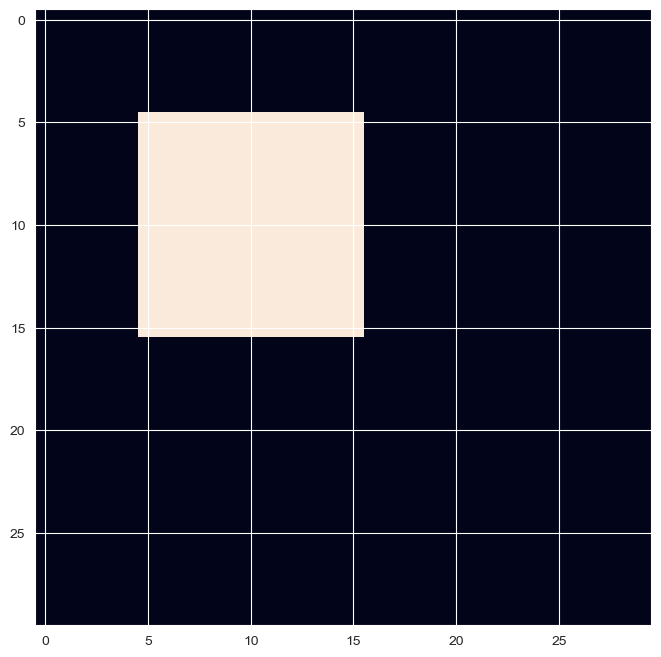

In [39]:
plt.figure(figsize=(8,8))
plt.imshow(slice_cube(center=(10,10), M=5, N=5))
plt.show()

In [40]:
M, M_c = slice_cube(cut=True, center=(3, 2), M=2, N=2)
M

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35]])

In [41]:
M_c

array([[ 6,  7,  8,  9, 10],
       [12, 13, 14, 15, 16],
       [18, 19, 20, 21, 22],
       [24, 25, 26, 27, 28],
       [30, 31, 32, 33, 34]])

#### Задача 9
- Написать функцию, которая находит самое часто встречающееся число в каждой строке матрицы и возвращает массив этих значений

In [42]:
def mass_number(path_to_matrix):
    
    result: list = []
    matrix = np.genfromtxt(path_to_matrix, dtype=int, delimiter=',')
    
    for line in matrix:
        
        u, indices = np.unique(line, return_inverse=True)
        result.append(u[np.argmax(np.bincount(indices))])
        
    return matrix, result
    
    

In [43]:
mass_number('data/mass_matrix.csv')

(array([[   1,    1,    2,    3,    4,    5],
        [   3,    3,    4,   -5,    0,   -1],
        [-100, -100, -100,    1,    2,    2],
        [   5,    6,    2,    5,    6,    6]]),
 [1, 3, -100, 6])

Задача 10
- Дан трёхмерный массив, содержащий изображение, размера (height, width, numChannels), а также вектор длины numChannels. Написать функцию, которая складывает каналы изображения с указанными весами, и возвращает результат в виде матрицы размера (height, width)

In [44]:
rand = np.random.randint(0,256, [5, 5, 3], dtype=np.uint8)


In [45]:
def injection(img, Q):
    return (img * Q).astype(np.uint8)
    

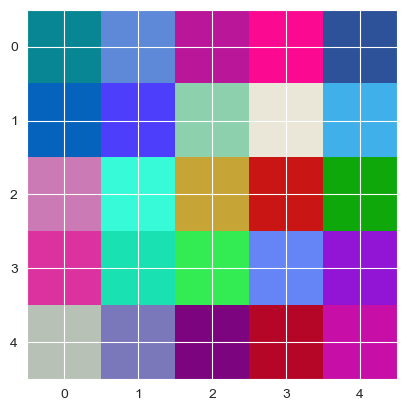

In [46]:
plt.imshow(rand)

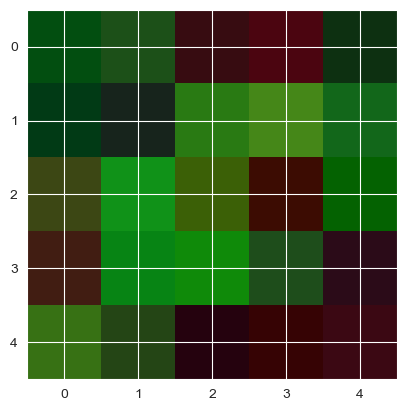

In [47]:
weights = np.array([0.299, 0.587, 0.114])
w = np.array([0.5, 0.5, 0.5])
plt.imshow(injection(rand, weights))